<a href="https://www.kaggle.com/code/jatin2055/ensemble-voting?scriptVersionId=262380615" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset-elarged-with-smote/iris_synthetic_data.csv


In [2]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import VotingClassifier

In [3]:
df = pd.read_csv('/kaggle/input/iris-dataset-elarged-with-smote/iris_synthetic_data.csv')

print(df.shape)

(3000, 5)


In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa


# LabelEncoding

In [5]:
le = LabelEncoder()

df['label'] = le.fit_transform(df['label'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

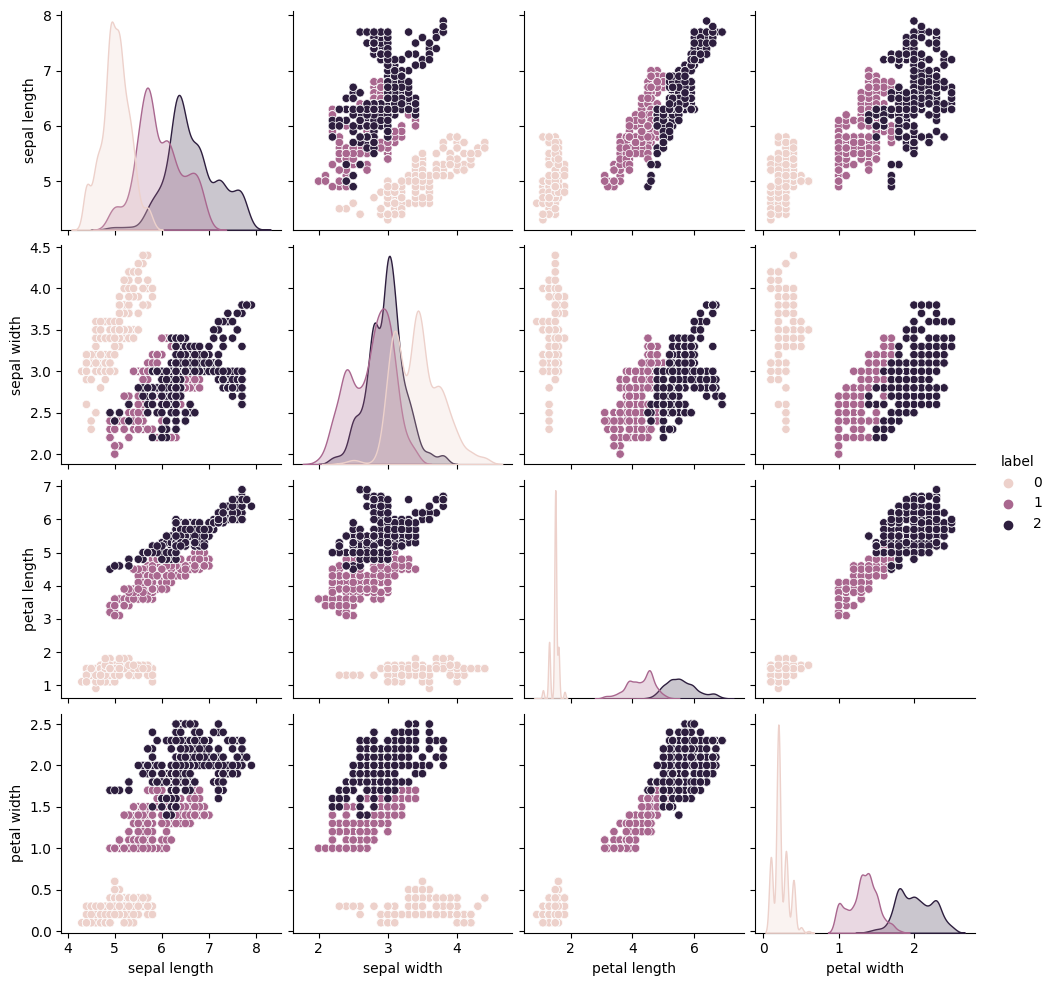

In [6]:
sns.pairplot(df, hue='label')

In [7]:
# removing petal lenght and petal width as they are easily identifiable
# also removing species = 0 as it can easily classified.

In [8]:
new_df = df[df['label'] != 0][['sepal length', 'sepal width', 'label']]

In [9]:
new_df

,sepal length,sepal width,label
1000,5.4,2.4,1
1001,5.8,2.7,1
1002,5.7,3.0,1
1003,5.3,2.5,1
1004,5.7,3.0,1
...,...,...,...
2995,7.2,3.6,2
2996,7.3,3.0,2
2997,6.9,3.2,2
2998,7.5,2.8,2


In [10]:
X = new_df.iloc[:, 0:2]
y = new_df.iloc[:, -1]

In [11]:
lr = LogisticRegression()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
#cvs =  cross_val_score

In [12]:
estimators = [
    ('lr', lr),
    ('knc', knc),
    ('rfc', rfc),
]

In [13]:
scoring={"acc": "accuracy", "f1": "f1", "f1_macro": "f1_macro"}

# Cross Validation score of individual models

In [14]:
for estimator in estimators:
    result = cross_validate(estimator[1], X, y, cv=10, scoring=scoring)
    result['test_acc'] = np.round(np.mean(result['test_acc']), 4)
    result['test_f1_macro'] = np.round(np.mean(result['test_f1_macro']), 4)
    result['test_f1'] = np.round(np.mean(result['test_f1']), 4)

    final_output =  {"accuracy": result['test_acc'],
            "f1":    result['test_f1'],
            "f1_macro": result['test_f1_macro']
        }
    print(f"estimator: {estimator[0]}, \n result: {final_output}")

estimator: lr, 
 result: {'accuracy': 0.766, 'f1': 0.7645, 'f1_macro': 0.7657}
estimator: knc, 
 result: {'accuracy': 0.805, 'f1': 0.8321, 'f1_macro': 0.7995}
estimator: rfc, 
 result: {'accuracy': 0.8555, 'f1': 0.855, 'f1_macro': 0.8554}


# Voting Classfier - Hard

In [15]:
vc = VotingClassifier(estimators=estimators)

result = cross_validate(vc, X, y, cv=10, scoring=scoring)

result['test_acc'] = np.round(np.mean(result['test_acc']), 4)
result['test_f1_macro'] = np.round(np.mean(result['test_f1_macro']), 4)
result['test_f1'] = np.round(np.mean(result['test_f1']), 4)

final_output =  {"accuracy": result['test_acc'],
        "f1":    result['test_f1'],
        "f1_macro": result['test_f1_macro']
    }

print(final_output)

{'accuracy': 0.8535, 'f1': 0.8572, 'f1_macro': 0.8533}


# Voting Classfier - Soft

In [16]:
vc = VotingClassifier(estimators=estimators, voting = 'soft')

result = cross_validate(vc, X, y, cv=10, scoring=scoring)

result['test_acc'] = np.round(np.mean(result['test_acc']), 4)
result['test_f1_macro'] = np.round(np.mean(result['test_f1_macro']), 4)
result['test_f1'] = np.round(np.mean(result['test_f1']), 4)

final_output =  {"accuracy": result['test_acc'],
        "f1":    result['test_f1'],
        "f1_macro": result['test_f1_macro']
    }

print(final_output)

{'accuracy': 0.8275, 'f1': 0.8458, 'f1_macro': 0.8249}


# adding weightage

In [17]:
for i in range(1, 4):
    for j in range(1, 4):
        for k in range(1, 4):
            vc = VotingClassifier(estimators=estimators, voting = 'soft',  weights=[i, j, k])

            result = cross_validate(vc, X, y, cv=10, scoring=scoring)
            
            result['test_acc'] = np.round(np.mean(result['test_acc']), 4)
            result['test_f1_macro'] = np.round(np.mean(result['test_f1_macro']), 4)
            result['test_f1'] = np.round(np.mean(result['test_f1']), 4)
            
            final_output =  {"accuracy": result['test_acc'],
                    "f1":    result['test_f1'],
                    "f1_macro": result['test_f1_macro']
                }
            print(f"with weightage to lr:{i}, knc: {j}, rfc: {k}")
            print(final_output)
            print("\n")

with weightage to lr:1, knc: 1, rfc: 1
{'accuracy': 0.8295, 'f1': 0.8474, 'f1_macro': 0.827}


with weightage to lr:1, knc: 1, rfc: 2
{'accuracy': 0.8445, 'f1': 0.8537, 'f1_macro': 0.8437}


with weightage to lr:1, knc: 1, rfc: 3
{'accuracy': 0.847, 'f1': 0.8544, 'f1_macro': 0.8465}


with weightage to lr:1, knc: 2, rfc: 1
{'accuracy': 0.8255, 'f1': 0.8455, 'f1_macro': 0.8224}


with weightage to lr:1, knc: 2, rfc: 2
{'accuracy': 0.832, 'f1': 0.8494, 'f1_macro': 0.8296}


with weightage to lr:1, knc: 2, rfc: 3
{'accuracy': 0.8355, 'f1': 0.8518, 'f1_macro': 0.8334}


with weightage to lr:1, knc: 3, rfc: 1
{'accuracy': 0.822, 'f1': 0.8438, 'f1_macro': 0.8183}


with weightage to lr:1, knc: 3, rfc: 2
{'accuracy': 0.826, 'f1': 0.846, 'f1_macro': 0.8228}


with weightage to lr:1, knc: 3, rfc: 3
{'accuracy': 0.8345, 'f1': 0.8519, 'f1_macro': 0.8321}


with weightage to lr:2, knc: 1, rfc: 1
{'accuracy': 0.849, 'f1': 0.8564, 'f1_macro': 0.8485}


with weightage to lr:2, knc: 1, rfc: 2
{'accura

In [18]:
# Output

# Highest accuracy when weight as dividied as :

# with weightage to lr:2, knc: 1, rfc: 3
# {'accuracy': 0.8545, 'f1': 0.8606, 'f1_macro': 0.8541}


# original cross validation score
# estimator: lr, 
#  result: {'accuracy': 0.766, 'f1': 0.7645, 'f1_macro': 0.7657}
# estimator: knc, 
#  result: {'accuracy': 0.805, 'f1': 0.8321, 'f1_macro': 0.7995}
# estimator: rfc, 
#  result: {'accuracy': 0.852, 'f1': 0.8521, 'f1_macro': 0.8519}